# Assumptions of Linear Regression Algorithm

Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.

## Assumption 1:

**Each independent variable x should be linearly related to dependent variable Y.**

* **How to verify this assumption ?** <br>
   Using a Scatter plot. A straight line in the plot signifies a linear relationship.

>E.g. The first figure depicts alinear relationship whereas the second figure depicts a non linear relationship.

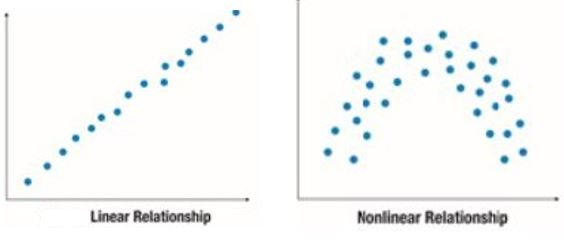

In [1]:
from IPython.display import Image
Image(filename="linear_nonlinear.jpg")

* **What should one do if the assumption is violated ?**
To overcome the issue of non-linearity, we can do a non linear transformation of predictors such as log transformation , taking square of the variable or removing the variable from the model in extreme situations.

### Example : Implementation of a Scatter plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame({'A': np.arange(50),
               'B': np.arange(50) + np.random.randn(50),
               'C': np.sqrt(np.arange(50)) + np.sin(np.arange(50)) })
print(df[:10])

   A         B         C
0  0  0.969524  0.000000
1  1  2.106204  1.841471
2  2  3.518054  2.323511
3  3  4.547090  1.873171
4  4  3.733894  1.243198
5  5  4.879048  1.277144
6  6  5.230957  2.170074
7  7  7.528943  3.302738
8  8  9.111672  3.817785
9  9  8.485552  3.412118


Text(0.5, 1.0, 'Scatterplot of X and Y')

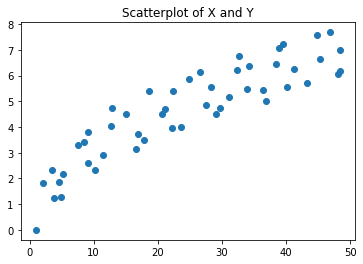

In [3]:
# Two variable Scatterplot
plt.scatter(df['B'], df['C'])
plt.title('Scatterplot of X and Y')

## Assumption 2 :

**Dependent variable Y and the residuals should be normally distributed.**

* **How to verify this assumption ?** <br>
   Using a Q-Q Plot. Also known as Quantile- Quantile plot, it is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. <br>
   I found [this](https://boostedml.com/2019/03/linear-regression-plots-how-to-read-a-qq-plot.html) article helpful while studying for QQ plot.

### Example : Implementation of Q-Q plot

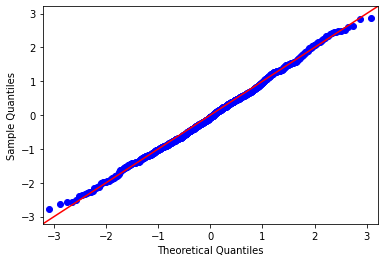

In [4]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
pylab.show()

If the maximum points lie on the 45 degree line then we can assume that the residuals or the target function y is normally distributed.

* **What happens when this assumption is violated ?**<br>
The p values wont be reliable

* **What to do when this assumption is violated ?**<br>
Take transformation of Y. Some transformations are :
    1. log
    2. box-box
    3. exp(y)
    4. Y^2

## Assumption 3 :

**There is no relationship between x variables.** <br>
**Or also called as No-multicollinearity Condition**

A little background or logic behind this condition:<br>
If two variables are highly collinear , it means that both variables have a large amount of 'similar' information. While building models, we need to make sure that the variables that have been included have unique information. If any variable is not providing any additional information, that variable is redundant and can be removed. Redundant variables often affect R square , which is one of the metrics for evaluating models.

* **How to check for multicollinearity condition ?**<br>
We can verify multicollinearity condition using VIF factor (Variance Inlflation factor) of all x variables <br>
where, $$ V.I.F. = 1 / (1 - R^2). $$
If VIF of a variable > 10, we can remove the variable <br>
You can read more about multicollinearity condition [here](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

### Example: Implementation of VIF factor

In this example, we have to predict **Price_in_thousands** of cars using rest of the x features

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
data=pd.read_csv("car_sales.csv")

In [6]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [7]:
y, X = dmatrices('Price_in_thousands~Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency', data, return_type='dataframe')

In [8]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [9]:
vif.round(1)

,VIF Factor,features
0,1005.6,Intercept
1,5.7,Engine_size
2,6.3,Curb_weight
3,4.5,Wheelbase
4,3.0,Width
5,4.2,Length
6,3.6,Horsepower
7,5.0,Fuel_capacity
8,4.0,Fuel_efficiency


* **What if we cannot remove the variable which has high VIF factor ?**<br>
Use regularisation techniques: <br>
    1. Ridge Regression
    2. Lasso Regression

## Assumption 4 :

**Variance of residuals should remain constant across all values of Y** <br>
**Also called as No-Heteroscedasticity condition**

Heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity). <br>
You can read more about Heteroscadasticity condition [here](https://statisticsbyjim.com/regression/heteroscedasticity-regression/)

* **How to check this assumption?** <br>
Scatter Plot of Y vs Residuals <br>
If there exists a funnel in the scatter plot (refer the Examplpe below), it means there exists heteroscadascticity

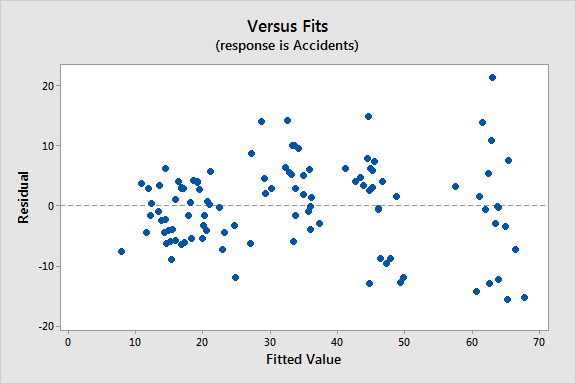

In [10]:
Image(filename="residuals_unfixed.png")

* **What happens when this assumption is violated ?** <br>
Because of Heteroscedasticity, Standard error changes, which causes fluctuations in t statistics making the P values unreliable.

* **What can we do to avoid this violation ?** <br>
Take transformation of Y 

## Assumption 5 :

**There is no Correlation of error terms with Lag values** <br>
**Also called as No-Autocorrelation**

* **How to verify this condition** ? <br> 
We can verify this assumption using Durbin-Watson (db) test Statistics (which is a by product of Linear Regresion models in statsmodel.api)<br>
If db ~ 2 , it means there exists no Autocorrelation. <br>
You can read more about the Db test [here](https://www.statsmodels.org/devel/generated/statsmodels.stats.stattools.durbin_watson.html)

* **What to do when this condition is violated** ? <br> 
Take transformation of Y.

#### Example: I am attaching a result of one of the models that  trained using Statsmodel.api. 

In this example we can see that the Durbin-Watson statistics is closer to 2, hence fulfilling the assumption of No -autocorrelation.

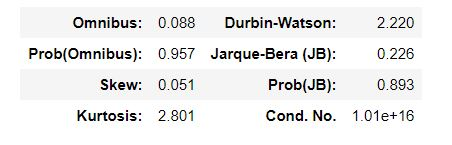

In [11]:
Image(filename="db_result.jpg")